# Exploratory Data Analysis & Introduction
## Goal
1) Investigate top-paying roles and skills in the data science industry.
2) Use Python to explore a real-live dataset on job postings.
3) For job-seekers: Use these insights to help find the best opportunities.

## Final Deliverables:
1) Create Jupyter Notebooks (showcasing core skills in Python).
2) Create a summary page (via README.md) capturing your findings.
3) Share this project via GitHub & LinkedIn.

## Roles to Explore:

In [34]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
df = pd.read_csv('data_jobs_dataset.csv')

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'],dayfirst=True)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [35]:
df

,Unnamed: 0,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:00,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:00,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:00,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:00,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:00,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:00,False,False,Singapore,NaN,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:00,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:00,False,False,Malaysia,NaN,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:00,False,False,Sudan,NaN,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [36]:
df.isnull().sum()

Unnamed: 0                    0
job_title_short               0
job_title                     1
job_location               1045
job_via                       8
job_schedule_type         12667
job_work_from_home            0
search_location               0
job_posted_date               0
job_no_degree_mention         0
job_health_insurance          0
job_country                   0
salary_rate              752674
salary_year_avg          763738
salary_hour_avg          775079
company_name                 18
job_skills               117037
job_type_skills          117037
dtype: int64

In [37]:
df.drop(columns=['job_location','job_via','salary_rate','salary_hour_avg'],inplace=True)

In [38]:
df.columns

Index(['Unnamed: 0', 'job_title_short', 'job_title', 'job_schedule_type',
       'job_work_from_home', 'search_location', 'job_posted_date',
       'job_no_degree_mention', 'job_health_insurance', 'job_country',
       'salary_year_avg', 'company_name', 'job_skills', 'job_type_skills'],
      dtype='object')

In [39]:
df.isnull().sum()

Unnamed: 0                    0
job_title_short               0
job_title                     1
job_schedule_type         12667
job_work_from_home            0
search_location               0
job_posted_date               0
job_no_degree_mention         0
job_health_insurance          0
job_country                   0
salary_year_avg          763738
company_name                 18
job_skills               117037
job_type_skills          117037
dtype: int64

# Top 10 Countries with highest number of job openings

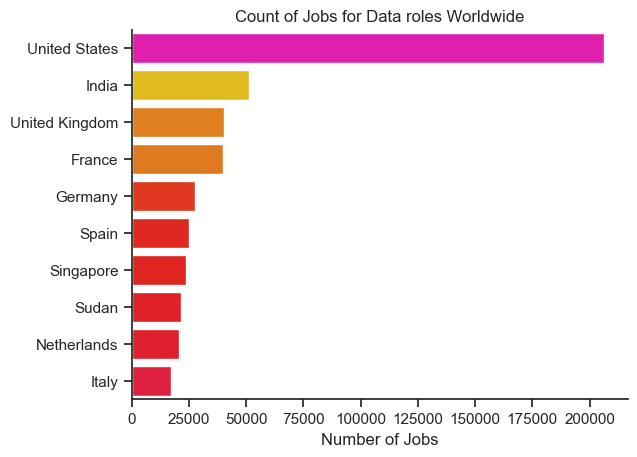

In [40]:
df_plot = df['job_country'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='gist_rainbow', legend=False)
sns.despine()
plt.title('Count of Jobs for Data roles Worldwide')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

# Top 10 companies with highest number of job openings around the World

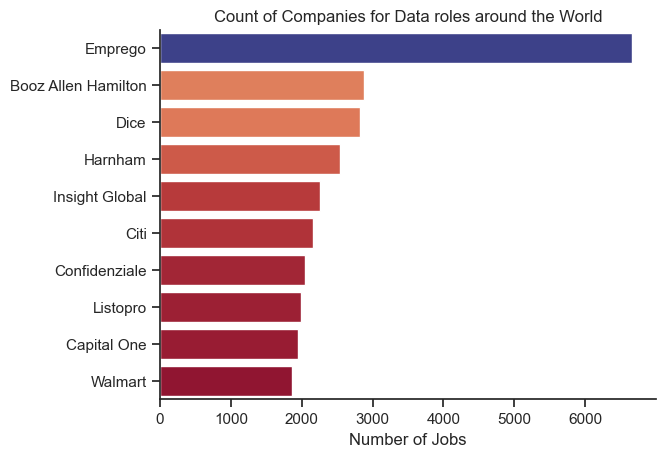

In [41]:
df_plot = df['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='RdYlBu', legend=False)
sns.despine()
plt.title('Count of Companies for Data roles around the World')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

# Data Analyst Job Openings around the World by WFH, Degree Requirement and Health Insurance Offer

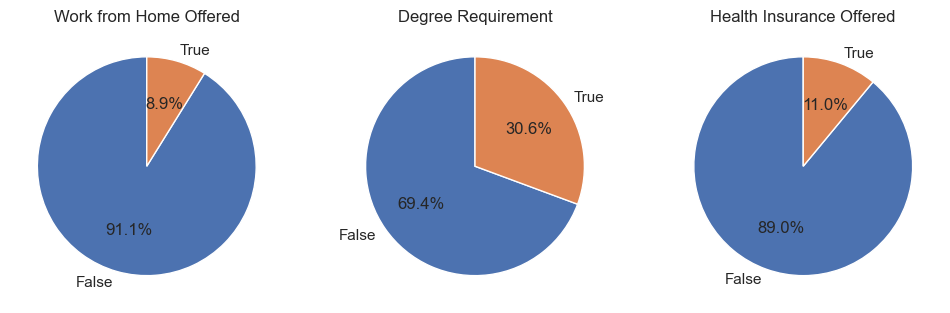

In [42]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention':'Degree Requirement',
    'job_health_insurance':'Health Insurance Offered'
}
fig, ax= plt.subplots(1,3)
fig.set_size_inches((12,5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()